# 1. Regressive Tennis T-Test

Use a linear regression and statsmodels to run a t-test on whether Federer scores more points than his opponents in the `tennis.csv` dataset.

Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value. 

Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

In [1]:
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fed = pd.read_csv('/Users/kalebmckenzie/Documents/GitHub/m3-2-regression-interpretation/data/tennis.csv')

In [122]:
x = fed['player1 total points won'].fillna(0)
y = fed['player2 total points won'].fillna(0)


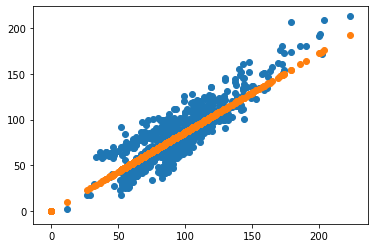

In [123]:
fed_model = sm.OLS(y, x).fit()

y_fed = fed_model.predict(x)

fig, ax = plt.subplots()

ax.scatter(x, y)
ax.scatter(x, y_fed)

plt.show()


In [124]:
fed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player2 total points won   R-squared (uncentered):                   0.969
Model:                                  OLS   Adj. R-squared (uncentered):              0.969
Method:                       Least Squares   F-statistic:                          3.670e+04
Date:                      Sat, 16 Jan 2021   Prob (F-statistic):                        0.00
Time:                              15:42:50   Log-Likelihood:                         -4710.2
No. Observations:                      1179   AIC:                                      9422.
Df Residuals:                          1178   BIC:                                      9427.
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
player1 total points won     0.8618      0.004    191.569      0.000       0.853       0.871
==============================================================================
Omnibus:                       93.438   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.040
Skew:                           0.720   Prob(JB):                     1.05e-25
Kurtosis:                       3.519   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
"""
Looking at the coeff, for every 1 unit of increase to federer
player 2 see's an increase of .86
meaning Federer does score more points than his opponents.

The p-value is 0, meaning the probability is very small

There is also no need for a constant term, as the data fits
nicely without one seeing as the matricies are equal.
If you add a constant term, the data doesnt fit properly


"""

'\nLooking at the coeff, for every 1 unit of increase\nwe can expect to see an increase in y by .86\nThe p-value is 0, meaning the probability is very small\n\nThere is also no need for a constant term, as the data fits\nnicely without one seeing as the matricies are equal.\n\n\n'

# 2. College admissions

Using the `college.csv` dataset, answer the following:

1. Is the relation between `Top10perc` and `Top25perc` best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best of these model specifications?

2. Do private schools see more admissions overall? T-test this using a linear regression. Hint: use a binary explanatory variable for `Private`. Explain your model specification choices.


In [7]:
college = pd.read_csv('/Users/kalebmckenzie/Documents/GitHub/m3-2-regression-interpretation/data/college.csv')
college['Top10perc2'] = (college.Top10perc ** 2)

# 2.1

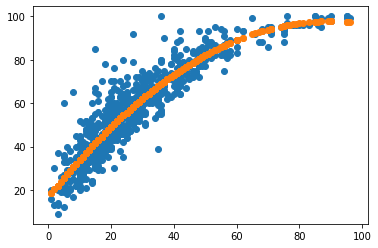

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Top25perc   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     2220.
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          2.50e-321
Time:                        13:17:32   Log-Likelihood:                -2681.0
No. Observations:                 777   AIC:                             5368.
Df Residuals:                     774   BIC:                             5382.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6786      0.845     19.738      0.000      15.020      18.337
Top10perc      1.8140      0.050     36.229      0.000       1.716       1.912
Top10perc2    -0.0102      0.001    -17.072      0.000      -0.011      -0.009
==============================================================================
Omnibus:                      177.730   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.823
Skew:                           1.089   Prob(JB):                    1.12e-124
Kurtosis:                       6.590   Cond. No.                     5.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:

x = sm.add_constant(college[['Top10perc', 'Top10perc2']])
y = college['Top25perc']
est = sm.OLS(college.Top25perc, x).fit()

yfit = est.predict(x)

plt.scatter(x.iloc[:,1], y)
plt.scatter(x['Top10perc'],yfit)
plt.show()
est.summary()

In [9]:
"""
1. Adding a constant term is useful to align the data
after squaring for the regression line.

creating a second top10 column and sqauring it allows the regression line to follow the
flow of the graph

2. for 2.2 I chose to use Enrollments
I chose to use pd.get_dummies to turn the private
column into a OHE matrix
this worked a lot better than singling out the yes and nos of the private
column.
Private schools see about 456 more admissions than non private
"""

'\n1. Adding a constant term is useful to align the data\nafter squaring for the regression line.\n\ncreating a second top10 column and sqauring it allows the regression line to follow the\nflow of the graph\n\n2. for 2.2 I chose to use Enrollments\nI chose to use pd.get_dummies to turn the private\ncolumn into a OHE matrix\nthis worked a lot better than singling out the yes and nos of the private\ncolumn.\n'

# 2.2

In [10]:
sm.OLS(
    college.Enroll,
    sm.add_constant(
        pd.get_dummies(college.Private, drop_first=True)
    )
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Enroll   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     368.9
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           1.49e-67
Time:                        13:17:32   Log-Likelihood:                -6261.0
No. Observations:                 777   AIC:                         1.253e+04
Df Residuals:                     775   BIC:                         1.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.8726     52.560     31.219      0.000    1537.695    1744.050
Yes        -1183.9275     61.637    -19.208      0.000   -1304.924   -1062.931
==============================================================================
Omnibus:                      421.162   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3666.463
Skew:                           2.310   Prob(JB):                         0.00
Kurtosis:                      12.587   Cond. No.                         3.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Im taking the largest acceptance observations from Private schools and non Private
and making them the same length.

# 3. Auto prediction

Using the `auto.csv` dataset, perform a simple linear regression with `mpg` as the response variable and horsepower as the predictor. Answer the following:

 i. Is there a relationship between the predictor and the response?
 
 ii. How strong is the relationship between the predictor and the response?
 
 iii. Is the relationship between the predictor and the response positive or negative?

 iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

 v. Make a regression plot the response and the predictor.

In [ ]:
"""
There is a relationship between mpg and horsepower
usually more horses equals a heavier frame, meaning the mpg will be lower.
The relationship is negative, bc as the horses rise the mpg falls
"""

In [37]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

dfa = pd.read_csv('data/auto.csv', names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
dfa = dfa.dropna()
dfa

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
2,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
3,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
4,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
5,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
6,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
394,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
395,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
396,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
397,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


# 3.1

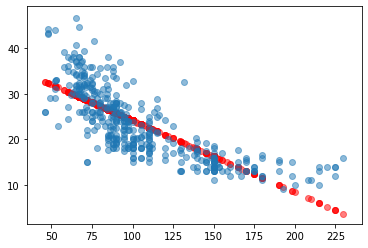

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           7.03e-81
Time:                        13:44:52   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
Horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
x = dfa['Horsepower'].astype(float)
y = dfa['MPG'].astype(float)
x = sm.add_constant(x)

c_model = sm.OLS(y,x).fit()

c_pred = c_model.predict(x)

fig, ax = plt.subplots()
ax.scatter(x.iloc[:,1],c_pred,alpha=0.5,color='r')
ax.scatter(x.iloc[:,1],y,alpha=0.5)
plt.show()
c_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           5.40e-99
Time:                        13:45:29   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          56.9001      1.800     31.604      0.000      53.360      60.440
Horsepower     -0.4662      0.031    -14.978      0.000      -0.527      -0.405
Horsepower2     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

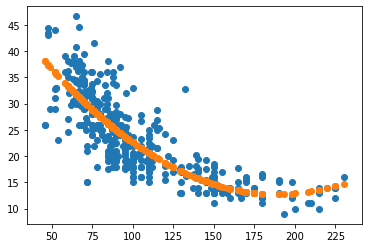

In [39]:
dfa['Horsepower2'] = (dfa.Horsepower ** 2).astype(float)
X = sm.add_constant(dfa[['Horsepower', 'Horsepower2']])
est = sm.OLS(y, X).fit()
yfit = est.predict(X)
plt.scatter(x.iloc[:,1], y)
plt.scatter(x['Horsepower'],yfit)
est.summary()

# 4. Auto Multiple Regression

Perform a multiple linear regression with `mpg` as the response and all other variables except name in `auto` as the predictors. Comment on the output:

i. Is there a relationship between the predictors and the response?

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?

v. Is there heteroscedasticity in the fit?

In [ ]:
"""
The is a relationship between them,
the r2 shows that the data fits well.
The is a negative relationship with cylinders, horsepower, and weight
which is to be expected!
If a car has more cylinders its probably has a lot of horsepower which in turn
makes it considerably more heavy, which then lowers the MPG a lot.

acceleration, cylinders, horsepower all have p_values higher than .05
which I already explained why.

the coef for the year suggestes that cars are getting more fuel efficient.

the r2 seems to be higher without a constant term

Yes there is heteroscedasticity in the fit
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          2.04e-139
Time:                        14:30:09   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
Cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
Displacement     0.0199      0.008      2.647      0.008       0.005       0.035
Horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
Weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
Acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
Model Year       0.7508      0.051     14.729      0.000       0.651       0.851
Origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

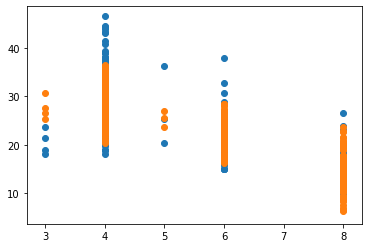

In [70]:
x1 = sm.add_constant(dfa[['Cylinders', 'Displacement', 'Horsepower', 'Weight',	'Acceleration',	'Model Year', 'Origin']]).astype(float)
y1 = (dfa['MPG']).astype(float)

mul_model = sm.OLS(y1, x1).fit()

y_mul = mul_model.predict(x1)

plt.scatter(x1.iloc[:,1], y1)
plt.scatter(x1.iloc[:,1] , y_mul)
mul_model.summary()

# 5. Car Seats

This question should be answered using the Carseats data set

1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

2. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?

4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.

6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [ ]:
"""
The ttest is invalid because we have categorical data in Urban and US

If the price increases by 1, then sales drop by 0.0545
which makes sense!

you can reject the null for Urban and US

I then fit a smaller model, looking at sales and price.
In doing a smaller more relevant model, the r2 is slightly better
showing that similar to price, an increace by 1 in age results in a 0.0488 loss in 
Sales
"""

In [106]:
dfc = pd.read_csv('/Users/kalebmckenzie/Documents/GitHub/m3-2-regression-interpretation/data/carseats.csv')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           2.39e-23
Time:                        14:53:01   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8164      0.309     22.043      0.000       6.208       7.424
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_No       3.4192      0.210     16.265      0.000       3.006       3.832
Urban_Yes      3.3972      0.201     16.878      0.000       3.002       3.793
US_No          2.8079      0.202     13.908      0.000       2.411       3.205
US_Yes         4.0085      0.201     19.893      0.000       3.612       4.405
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                     1.29e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.35e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

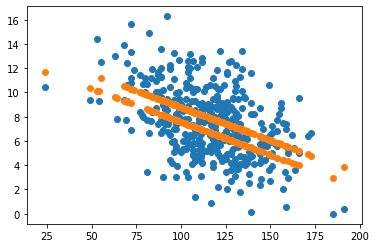

In [105]:
xs = sm.add_constant(pd.get_dummies(dfc[['Urban','US','Price']]))
ys = (dfc['Sales'])

seat_model = sm.OLS(ys, xs).fit()

y_seat = seat_model.predict(xs)

plt.scatter(xs.iloc[:,1], ys)
plt.scatter(xs.iloc[:,1] , y_seat)
seat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     75.55
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           1.57e-28
Time:                        15:02:34   Log-Likelihood:                -917.85
No. Observations:                 400   AIC:                             1842.
Df Residuals:                     397   BIC:                             1854.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6420      0.758     21.967      0.000      15.153      18.131
Price         -0.0565      0.005    -11.029      0.000      -0.067      -0.046
Age           -0.0488      0.007     -6.526      0.000      -0.064      -0.034
==============================================================================
Omnibus:                        3.248   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.329
Skew:                           0.210   Prob(JB):                        0.189
Kurtosis:                       2.846   Cond. No.                         813.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

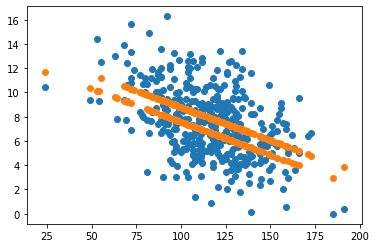

In [109]:
xs1 = sm.add_constant(dfc[['Price', 'Age']])
ys1 = (dfc['Sales'])

seat1_model = sm.OLS(ys1, xs1).fit()

y_seat1 = seat1_model.predict(xs1)

plt.scatter(xs1.iloc[:,1], ys1)
plt.scatter(xs1.iloc[:,1] , y_seat)
seat1_model.summary()
